In [1]:
from framework_chatgpt import FrameWork
#from survival_probablity import PseudoDirac
#from framework import BorexinoRecoilSpectrum
#from framework import SuperkPrediction

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from cobaya.run import run

from getdist.mcsamples import MCSamplesFromCobaya
from getdist import plots, MCSamples
import getdist.plots as gdplt

plt.rcParams['text.usetex']=True
plt.style.use('classic')


In [2]:
frame          = FrameWork(resolution_correction=False, masked_val=0.1)
frame.distance = np.linspace(0.98,1.02,100)
prediction     = frame[0.308,0,6.9e-5]

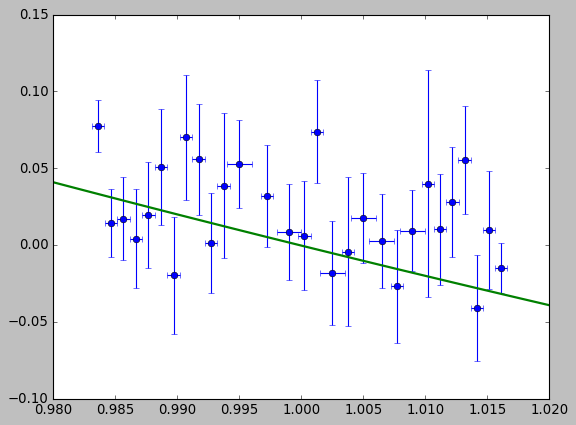

In [12]:
plt.ticklabel_format(useOffset=False)
plt.errorbar(np.sqrt(frame.data[:,0]),frame.data[:,1]/2.31 - 1,frame.data[:,2]/2.31,frame.data[:,3],fmt='o')
plt.plot(frame.distance,prediction/np.mean(prediction) - 1,ls='-',lw=2)

In [17]:
cond = frame.distance <1
print(np.trapz(prediction[cond]/np.mean(prediction) - 1 , frame.distance[cond] ))


cond = frame.distance >1
print(np.trapz(prediction[cond]/np.mean(prediction) - 1 , frame.distance[cond] ))

0.0003998784056612236
-0.0004000336667680753


In [26]:
mean_data = np.mean(frame.data[:,1])
mean_data = 2.31

cond = np.sqrt(frame.data[:,0]) < 1
print(np.trapz(frame.data[cond,1]/mean_data - 1, np.sqrt(frame.data[cond,0])))


cond = np.sqrt(frame.data[:,0]) > 1
print(np.trapz(frame.data[cond,1]/mean_data - 1, np.sqrt(frame.data[cond,0])))

0.0004616794997271423
0.00016149587292004606


In [12]:
frame = FrameWork(resolution_correction=False, masked_val=0.1)
error = frame.data[:,2]
data  = frame.data[:,1]

In [13]:
def LogLikelihood(t12,mum2,m12,delta):
    prediction = frame[t12,mum2,1e-5*m12]
    return -0.5*(np.sum(np.log10(2*np.pi*error**2) + ((1+delta)*prediction-data)**2/error**2))



info = {"likelihood": {"Chi2": LogLikelihood},
        
        "params": dict([("t12"  , {"prior" : {"min": 0.28, "max": 0.36},
                                  "latex" : r"\sin(\theta_{12})^2"  }),
                        
#                         ("mum2" , 0),
                        ("mum2" , {"prior" : {"min": 0, "max": 3},
                                   "latex" : r"\Delta m_{2}^2 \ \rm 10^{-11} \ eV^2"  }),
            
                        ("m12"  , {"prior" : {"dist": "norm", "loc": 7.54, "scale" : 0.2},
                                  "latex": r"\Delta m^2_{21} \ \rm 10^{-5} \ eV^2"  }),  
                        
                        ("delta", {"prior" : {"dist": "norm", "loc": 0, "scale" : 0.04},
                                  "latex": r"\delta"  })  
                        
                        
                        ]),
        
        "sampler": {"mcmc": {"Rminus1_stop": 0.001, "max_tries": 100000}}
       }



In [14]:
updated_info,sampler = run(info)

[chi2] Initialized external likelihood.
[prior] *WARNING* There are unbounded parameters (['m12', 'delta']). Prior bounds are given at 0.9999995 confidence level. Beware of likelihood modes at the edge of the prior
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {Chi2: 73.3}
[mcmc] Initial point: t12:0.3527306, mum2:0.5973797, m12:7.642612, delta:0.04912662
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Sampling!
[mcmc] Progress @ 2024-08-18 23:08:10 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 160 samples accep

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 5440 samples accepted.
[mcmc]  - Acceptance rate: 0.222
[mcmc]  - Convergence of means: R-1 = 0.017160 after 4352 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 5600 samples accepted.
[mcmc]  - Acceptance rate: 0.223
[mcmc]  - Convergence of means: R-1 = 0.005851 after 4480 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 5760 samples accepted.
[mcmc]  - Acceptance rate: 0.223
[mcmc]  - Convergence of means: R-1 = 0.009116 after 4608 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 5920 samples accepted.
[mcmc]  - Acceptance rate: 0.223
[mcmc]  - Convergence of means: R-1 = 0.006382 after 4736 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6080 samples accepted.
[mcmc]  - Acceptance rate:

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 11360 samples accepted.
[mcmc]  - Acceptance rate: 0.217
[mcmc]  - Convergence of means: R-1 = 0.014087 after 9088 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2024-08-18 23:15:10 : 53714 steps taken, and 11442 accepted.
[mcmc] Learn + convergence test @ 11520 samples accepted.
[mcmc]  - Acceptance rate: 0.217
[mcmc]  - Convergence of means: R-1 = 0.010999 after 9216 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 11680 samples accepted.
[mcmc]  - Acceptance rate: 0.217
[mcmc]  - Convergence of means: R-1 = 0.008647 after 9344 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 11840 samples accepted.
[mcmc]  - Acceptance rate: 0.217
[mcmc]  - Convergence of means: R-1 = 0.008742 after 9472 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


[mcmc] Learn + convergence test @ 17120 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.006674 after 13696 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 17280 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.007726 after 13824 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 17440 samples accepted.
[mcmc]  - Acceptance rate: 0.216
[mcmc]  - Convergence of means: R-1 = 0.011098 after 13952 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 17600 samples accepted.
[mcmc]  - Acceptance rate: 0.216
[mcmc]  - Convergence of means: R-1 = 0.010075 after 14080 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 17760 samples accepted.
[mcmc]  - Acceptance rate: 0.216
[mcmc]  - Convergence of means: R-1 =

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2024-08-18 23:22:10 : 107099 steps taken, and 22912 accepted.
[mcmc] Learn + convergence test @ 23040 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.003502 after 18432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 23200 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.003964 after 18560 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 23360 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.004257 after 18688 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 23520 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.004276 after 18816 accepted steps
[mcmc]  - Updated covariance matrix of proposal 

[mcmc] Learn + convergence test @ 28800 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.002985 after 23040 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 28960 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.002856 after 23168 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2024-08-18 23:26:10 : 135190 steps taken, and 28993 accepted.
[mcmc] Learn + convergence test @ 29120 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.003418 after 23296 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 29280 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.002863 after 23424 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 29440 samples 

[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.003481 after 27648 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 34720 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.004249 after 27776 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 34880 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.005066 after 27904 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 35040 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Convergence of means: R-1 = 0.005511 after 28032 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2024-08-18 23:30:10 : 163450 steps taken, and 35192 accepted.
[mcmc] Learn + convergence test @ 35200 samples accepted.
[mcmc]  - Acceptance rate: 0.215
[mcmc]  - Conve

[mcmc]  - Acceptance rate: 0.216
[mcmc]  - Convergence of means: R-1 = 0.003399 after 32256 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 40480 samples accepted.
[mcmc]  - Acceptance rate: 0.216
[mcmc]  - Convergence of means: R-1 = 0.003403 after 32384 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 40640 samples accepted.
[mcmc]  - Acceptance rate: 0.216
[mcmc]  - Convergence of means: R-1 = 0.002676 after 32512 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2024-08-19 01:25:29 : 189337 steps taken, and 40740 accepted.
[mcmc] Learn + convergence test @ 40800 samples accepted.
[mcmc]  - Acceptance rate: 0.216
[mcmc]  - Convergence of means: R-1 = 0.002448 after 32640 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 40960 samples accepted.
[mcmc]  - Acceptance rate: 0.216
[mcmc]  - Conve

KeyboardInterrupt: 

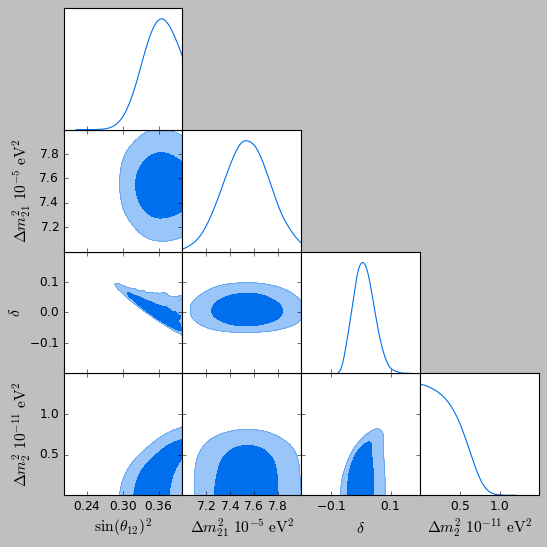

In [10]:
# Filled 2D comparison plot with legend
gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])

gdplot = gdplt.get_subplot_plotter(width_inch=7)

gdplot.settings.scaling = False
gdplot.triangle_plot(gd_sample, ["t12","m12","delta","mum2"], filled=True, 
                     param_limits={'t12': (0.28, 0.36), 
                                   'm12': (7, 8),
                                   'delta': (-0.2, 0.2),
                                   'mum2': (0, 1.5)
                                  },lw=2)

#gdplot.export('./bayes_1_nopriors.pdf')

In [ ]:
#best fit and covariance matrix and errors
mean   = gd_sample.getMeans()
covmat = gd_sample.getCovMat().matrix[:, :]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
print('####################')

stats = gd_sample.getMargeStats()
lims1 = stats.parWithName('t12').limits
lims2 = stats.parWithName('mum2').limits
lims3 = stats.parWithName('m12').limits
lims4 = stats.parWithName('delta').limits

for conf, lim1, lim2, lim3, lim4 in zip(gd_sample.contours, lims1,lims2,lims3,lims4):
    print('t12 %s%% lower: %.1f upper: %.1f (%s)'%(conf, lim1.lower, lim1.upper, lim1.limitType()))
    print('mum2 %s%% lower: %.2f upper: %.2f (%s)'%(conf, lim2.lower, lim2.upper, lim2.limitType()))
    print('m12 %s%% lower: %.2f upper: %.2f (%s)'%(conf, lim3.lower, lim3.upper, lim3.limitType()))
    print('delta %s%% lower: %.2f upper: %.2f (%s)'%(conf, lim3.lower, lim3.upper, lim3.limitType()))
    print('####################')